# NDVI Basic Analysis <img align="right" src="../resources/ama_logo.jpg" width=250 height=250>

This section will show you how to conduct a basic analysis in the ODC, specifically detecting vegetation change.

## Background
This will be our first section using the ODC in code. We will be approximating the amount of green vegetation through a vegetation proxy - something that attempts to represent the amount of vegetation in scenes.

Many topics relevant to this section, such as xarray, will be explained in later sections.

For an introduction to Python programming, see [this tutorial](https://www.w3schools.com/python/python_intro.asp).

## Description

Topics covered include:

* Common imports
* How to load data from the ODC
***

### Load Packages

In [1]:
# Python built-in packages #
import sys
import os
# Allow importing of our utilities.
sys.path.append(os.environ.get('NOTEBOOK_ROOT'))

# External packages #
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # Numerical processing
import xarray as xr # Coordinate indexed arrays
import pandas as pd # Tabular data structures for data analysis
import datacube # Facilitates loading data from the Data Cube

# Utilities #
from utils.data_cube_utilities.dc_display_map import display_map

### Connect to the Datacube

The `datacube` package allows us to access the data tracked by the datacube index database. We create a variable called `dc` that is a `datacube.Datacube` object. Set the `app` parameter to a unique name for this ODC client object - generally the notebook's name.

In [2]:
# Connect to the Data Cube.
dc = datacube.Datacube(app='NDVI_Training')

In [3]:
dc.list_products()

,name,description,lon,label,lat,time,creation_time,product_type,instrument,platform,format,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
1,ls8_l2_c2_path_123_row_032,Landsat 8 Collection 2 Level2 Surface Reflecta...,None,None,None,None,None,LaSRCollection2,OLI_TIRS,LANDSAT_8,GeoTiff,EPSG:4326,"(-0.00027777777778, 0.00027777777778)",None,"(latitude, longitude)"


### Load Data

Loading data from the datacube uses the [dc.load()](https://datacube-core.readthedocs.io/en/stable/dev/api/generate/datacube.Datacube.load.html) function.

The function requires the following minimum arguments:

* `product`: A specific product to load.
* `x`: Defines the spatial region in the *x* dimension.
* `y`: Defines the spatial region in the *y* dimension.
* `time`: Defines the temporal extent. The time dimension can be specified using a tuple of datetime objects or strings in the "YYYY", "YYYY-MM" or "YYYY-MM-DD" format. 

By default, the `x` and `y` arguments accept queries in a geographic coordinate system WGS84, identified by the EPSG code *4326*. This default coordinate system is has units of latitude for *y* and longitude for *x*.

Let's run a query to load data from the Landsat 8 product. We will be looking at Yuanmingyuan Park on January 2, 2018. For this example, we can use the following parameters:

* `product`: `ls8_l2_c2_path_123_row_032`
* `x`: `(116.282512, 116.313926)`
* `y`: `(39.989410, 40.014460)`
* `time`: `("2018-01-02", "2018-01-02")`

Run the following cell to load all datasets from this product that match this spatial and temporal extent:

In [4]:
ds = dc.load(product="ls8_l2_c2_path_123_row_032",
             x=(116.282512, 116.313926),
             y=(39.989410, 40.014460),
             time=("2018-01-02", "2018-01-02"),
             measurements=['red', 'green', 'blue', 'nir']).squeeze()

In [5]:
ds

<xarray.Dataset>
Dimensions:      (latitude: 92, longitude: 114)
Coordinates:
    time         datetime64[ns] 2018-01-02T02:53:40.034961
  * latitude     (latitude) float64 40.01 40.01 40.01 ... 39.99 39.99 39.99
  * longitude    (longitude) float64 116.3 116.3 116.3 ... 116.3 116.3 116.3
    spatial_ref  int32 4326
Data variables:
    red          (latitude, longitude) uint16 15037 14378 14578 ... 12714 12915
    green        (latitude, longitude) uint16 14691 13995 13954 ... 12345 12553
    blue         (latitude, longitude) uint16 12620 12008 12328 ... 11062 10958
    nir          (latitude, longitude) uint16 15816 15280 15851 ... 13813 14059
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

The variable containing the data, `ds`, is an `xarray.Dataset` object, which we will discuss in detail in a future section.

### Calculate Vegetation Proxy

We will approximate vegetation with the Normalized Difference Vegetation Index, which is also called a "spectral index". More information about spectral indices will be discussed a future section.

To calculate spectral indicies, we use the `calculate_indices()` function (defined [here](https://github.com/GeoscienceAustralia/dea-notebooks/blob/develop/Tools/dea_tools/bandindices.py#L29)). In this environment, it is available at `utils.dea_tools.bandindices`.

In [6]:
from utils.dea_tools.bandindices import calculate_indices

In [7]:
ds = calculate_indices(ds, index='NDVI', collection='c2')

### Visualize Vegetation Proxy and the RGB Image of the Area

We will visualize the NDVI values, with greener pixels representing areas that NDVI perceives to have more vegetation. After that, we will show the RGB image of this area with the `rgb()` function, which in this environment is available at `utils.dea_tools.plotting`.

Note that water has lower NDVI values - here, about -0.2.

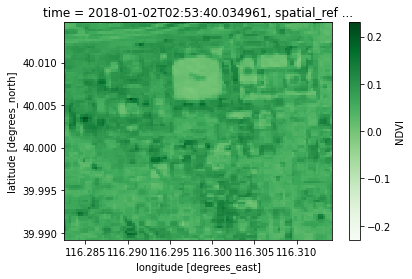

In [8]:
ds.NDVI.plot.imshow(cmap='Greens')
plt.show()

In [9]:
from utils.dea_tools.plotting import rgb

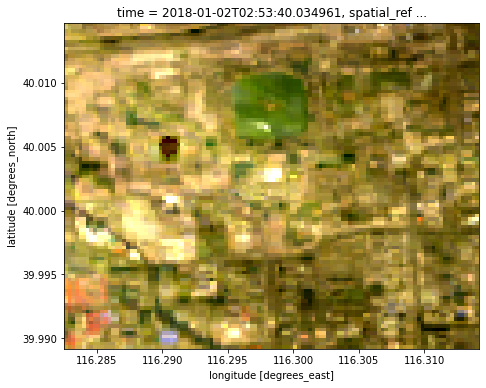

In [10]:
rgb(ds)